<a href="https://colab.research.google.com/github/Mwadz/Exploratory-Data-Analysis/blob/main/Chicago_Crimes_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chicago Crimes EDA

# Importing Libraries and Loading Data

In [ ]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
# loading dataset
data = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/Chicago_Crime_Detective.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
# previewing the dataset
data.head(3)

,Unnamed: 0,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year
0,0,8951354,12/31/12 23:15,STREET,False,False,623,6,69,2012
1,1,8951141,12/31/12 22:00,STREET,False,False,1213,12,24,2012
2,2,8952745,12/31/12 22:00,RESIDENTIAL YARD (FRONT/BACK),False,False,1622,16,11,2012


# Question 1
What is the Month and Year of the median date in our dataset? *

Enter your answer as "Month Year", without the quotes.


January 2006

March 2006

<font color = 'green'>May 2006</font>

June 2006

In [ ]:
data.describe()

,Unnamed: 0,ID,Beat,Year
count,191641.000000,1.916410e+05,191641.000000,191641.000000
mean,95820.000000,4.968629e+06,1258.810771,2006.134940
std,55322.135806,2.342997e+06,702.530465,3.520285
min,0.000000,1.310022e+06,111.000000,2001.000000
25%,47910.000000,2.832144e+06,722.000000,2003.000000
50%,95820.000000,4.762956e+06,1121.000000,2006.000000
75%,143730.000000,7.201878e+06,1733.000000,2009.000000
max,191640.000000,9.181151e+06,2535.000000,2012.000000


The median year is 2006

In [ ]:
# changing date datatype
data['Date'] = pd.to_datetime(data['Date'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191641 entries, 0 to 191640
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Unnamed: 0           191641 non-null  int64         
 1   ID                   191641 non-null  int64         
 2   Date                 191641 non-null  datetime64[ns]
 3   LocationDescription  191641 non-null  object        
 4   Arrest               191641 non-null  bool          
 5   Domestic             191641 non-null  bool          
 6   Beat                 191641 non-null  int64         
 7   District             148589 non-null  object        
 8   CommunityArea        167038 non-null  object        
 9   Year                 191641 non-null  int64         
dtypes: bool(2), datetime64[ns](1), int64(4), object(3)
memory usage: 12.1+ MB


In [ ]:
# finding the median date
data['Date'].astype('datetime64[ns]').quantile(0.5, interpolation="midpoint")

Timestamp('2006-05-21 12:30:00')

**Ans**: May 2006

# Question 2
In which month did the lowest motor vehicle thefts occur? *

January

<font color='green'>February</font>

March

April

In [ ]:
# creating a month column
data['month'] = pd.to_datetime(data['Date']).dt.month

In [ ]:
data.head(2)

,Unnamed: 0,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year,month
0,0,8951354,2012-12-31 23:15:00,STREET,False,False,623,6,69,2012,12
1,1,8951141,2012-12-31 22:00:00,STREET,False,False,1213,12,24,2012,12


In [ ]:
thefts = data.groupby('month')['Date'].count()

In [ ]:
thefts.min()

13511

In [ ]:
thefts


month
1     16047
2     13511
3     15758
4     15280
5     16035
6     16002
7     16801
8     16572
9     16060
10    17086
11    16063
12    16426
Name: Date, dtype: int64

**Ans**: February

# Question 3
In which month did the highest motor vehicle thefts occur? *

September

<font color='green'>October</font>

November

December

In [ ]:
thefts.max()

17086

In [ ]:
thefts

month
1     16047
2     13511
3     15758
4     15280
5     16035
6     16002
7     16801
8     16572
9     16060
10    17086
11    16063
12    16426
Name: Date, dtype: int64

Month 10(October is the answer)

# Question 4
On which day of the week did most motor vehicle thefts occur?

Monday

Wednesday

<font color='green'>Friday</font>

Sunday

In [ ]:
# creating a day column
data['day'] = pd.to_datetime(data['Date']).dt.day

In [ ]:
data.head(2)

,Unnamed: 0,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year,month,day
0,0,8951354,2012-12-31 23:15:00,STREET,False,False,623,6,69,2012,12,31
1,1,8951141,2012-12-31 22:00:00,STREET,False,False,1213,12,24,2012,12,31


In [ ]:
thefts2 = data.groupby('day')['Date'].count()

In [ ]:
thefts2

day
1     6446
2     6098
3     6096
4     5947
5     6339
6     6219
7     6329
8     6184
9     6180
10    6404
11    6254
12    6455
13    6208
14    6355
15    6690
16    6243
17    6361
18    6304
19    6388
20    6453
21    6410
22    6278
23    6361
24    6155
25    6230
26    6218
27    6379
28    6386
29    5862
30    5750
31    3659
Name: Date, dtype: int64

In [ ]:
thefts.max()

6690

**15th is the most common day for bike thefts**

In [ ]:
from collections import Counter

# Calculating day of the week for each date

daysOfWeek = [i.day_name() for i in data['Date']]



# using Counter subclass for counting the no. of occurrences of a particular day (Hence, indicating the no. of crimes on that day)
dictDays = Counter(daysOfWeek)

dictDays

Counter({'Friday': 29284,
         'Monday': 27397,
         'Saturday': 27118,
         'Sunday': 26316,
         'Thursday': 27319,
         'Tuesday': 26791,
         'Wednesday': 27416})

In [ ]:
max(dictDays, key=dictDays.get)

'Friday'

**Friday is the most frequent day**

# Question 5
Each observation in the dataset represents a motor vehicle theft, and the Arrest variable indicates whether an arrest was later made for this theft. Which month has the largest number of motor vehicle thefts for which an arrest was made?

January (correct answer)

February

March

April

In [ ]:
arrest_data = data['Date'][data['Arrest'] == True]

In [ ]:
# Calculating month name from each date
monthNames = [i.month_name() for i in arrest_data]
# using Counter subclass for counting the no. of occurrences of a particular month (Hence, indicating the no. of crimes in that month)
dictMonths = Counter(monthNames)
dictMonths

Counter({'April': 1252,
         'August': 1329,
         'December': 1397,
         'February': 1238,
         'January': 1435,
         'July': 1324,
         'June': 1230,
         'March': 1298,
         'May': 1187,
         'November': 1256,
         'October': 1342,
         'September': 1248})

In [ ]:

max(dictMonths, key=dictMonths.get)

'January'

**Ans**: January

# Question 6
Select the incorrect statement

It look like crime decreases from 2002 - 2012

It look like crime increases from 2005 - 2008

<font color='green'>It look like crime increases from 2009 - 2011</font>

In [ ]:
data.head()

,Unnamed: 0,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year,month,day
0,0,8951354,2012-12-31 23:15:00,STREET,False,False,623,6,69,2012,12,31
1,1,8951141,2012-12-31 22:00:00,STREET,False,False,1213,12,24,2012,12,31
2,2,8952745,2012-12-31 22:00:00,RESIDENTIAL YARD (FRONT/BACK),False,False,1622,16,11,2012,12,31
3,3,8952223,2012-12-31 22:00:00,STREET,False,False,724,7,67,2012,12,31
4,4,8951608,2012-12-31 21:30:00,STREET,False,False,211,2,35,2012,12,31


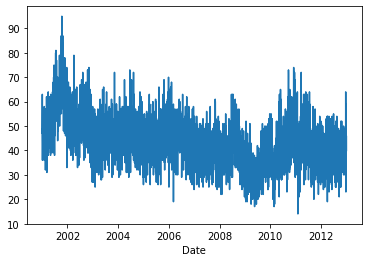

In [ ]:
data.groupby(data['Date'].dt.date).size().plot();

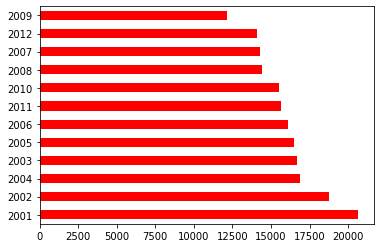

In [ ]:
# selecting the year dataset
year_data = data['Year']
year_data.value_counts()[:20].plot(kind='barh',color='red');

**It look like crime increases from 2009 - 2011**

# Question 7
Crimes for which more arrests were made are in the first half of the time period or the second half of the time period?

(Note that the time period is from 2001 to 2012, so the middle of the time period is the beginning of 2007.)

1. <font color='green'>First half</font>
2. Second half


In [ ]:
arrest_df = pd.DataFrame(arrest_data)
arrest_df

,Date
5,2012-12-31 20:30:00
8,2012-12-31 19:00:00
13,2012-12-31 16:20:00
47,2012-12-30 19:46:00
59,2012-12-30 15:00:00
...,...
191600,2001-01-01 18:30:00
191601,2001-01-01 18:00:00
191607,2001-01-01 16:00:00
191628,2001-01-01 03:00:00


In [ ]:
arrest_df['year'] = pd.to_datetime(arrest_df['Date']).dt.year

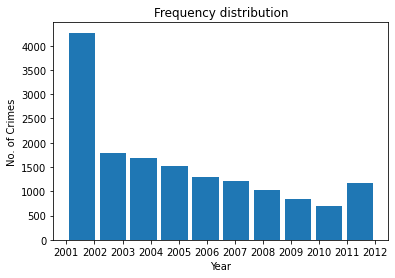

In [ ]:
# Plotting a Histogram (Frequency Distribution)
plt.hist(arrest_df['year'], rwidth=0.85)
plt.ylabel("No. of Crimes")
plt.xlabel("Year")
plt.xticks(np.arange(2001, 2013))
plt.title("Frequency distribution")
plt.show()

**First half has more arrests**

# Question 8
For what proportion of motor vehicle thefts in 2001 was an arrest made? *
**Note:** In this question, we are asking for an answer as a proportion. Therefore, your answer should take a value between 0 and 1

1. 0.06
2. 0.08
3. <font color='green'>0.10</font>
4. 0.12

In [ ]:
y1_data = data[data['Year'] == 2001]

In [ ]:
y1_arrest = y1_data['Arrest'].value_counts()

In [ ]:
y1_df = pd.DataFrame(y1_arrest)
y1_df

,Arrest
False,18517
True,2152


In [ ]:
y1_df['Percentage']= (y1_df['Arrest']/(y1_df['Arrest'].sum()))*100

In [ ]:
y1_df

,Arrest,Percentage
False,18517,89.588272
True,2152,10.411728


**Ans**: 0.10

# Question 9
Create a subset of your data, only taking observations for which the theft happened in one of the top five locations for motor vehicle thefts, excluding the "Other" category. Call this new data set "Top5". How many observations are in Top5?

1. <font color='green'>177510 </font>
2. 177515
3. 177520
4. 177525

In [ ]:
# finding number of observations for each location
data['LocationDescription'].value_counts().head(7)

STREET                            156564
PARKING LOT/GARAGE(NON.RESID.)     14852
OTHER                               4573
ALLEY                               2308
GAS STATION                         2111
DRIVEWAY - RESIDENTIAL              1675
RESIDENTIAL YARD (FRONT/BACK)       1536
Name: LocationDescription, dtype: int64

In [ ]:
# extracting number of records for location other
other = (data['LocationDescription'] == 'OTHER').sum()
other

4573

In [ ]:
# top five sum
top6 = data['LocationDescription'].value_counts().head(6).sum()
top6

182083

In [ ]:
# Since other is in the top 5 we do the sum of 6 then subtract value of other
ans = top6 - other
print(ans)


177510


# Question 10
On which day of the week do the most motor vehicle thefts at gas stations happen? *

1. Tuesday
2. Thursday
3. Saturday
4. Sunday


In [ ]:
data3 = data[(data['LocationDescription'] == 'GAS STATION')]
data3

,Unnamed: 0,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year,month,day
13,13,8950570,2012-12-31 16:20:00,GAS STATION,True,False,825,8,66,2012,12,31
106,106,8948353,2012-12-29 10:00:00,GAS STATION,False,False,823,8,66,2012,12,29
213,213,8945802,2012-12-27 10:00:00,GAS STATION,False,False,321,3,42,2012,12,27
278,278,8943877,2012-12-25 10:00:00,GAS STATION,False,False,332,3,43,2012,12,25
290,290,8943595,2012-12-24 21:55:00,GAS STATION,False,False,421,4,43,2012,12,24
...,...,...,...,...,...,...,...,...,...,...,...,...
191335,191335,1323645,2001-01-06 16:00:00,GAS STATION,False,False,623,NaN,NaN,2001,1,6
191350,191350,1319694,2001-01-06 11:30:00,GAS STATION,False,False,2533,NaN,NaN,2001,1,6
191376,191376,1356080,2001-01-05 22:00:00,GAS STATION,False,False,632,NaN,NaN,2001,1,5
191562,191562,1313797,2001-01-02 18:10:00,GAS STATION,False,False,523,NaN,NaN,2001,1,2


In [ ]:
from collections import Counter

# Calculating day of the week for each date

daysOfWeek = [i.day_name() for i in data3['Date']]



# using Counter subclass for counting the no. of occurrences of a particular day (Hence, indicating the no. of crimes on that day)
dictDays = Counter(daysOfWeek)

dictDays

Counter({'Friday': 332,
         'Monday': 280,
         'Saturday': 338,
         'Sunday': 336,
         'Thursday': 282,
         'Tuesday': 270,
         'Wednesday': 273})

In [ ]:
max(dictDays, key=dictDays.get)

'Saturday'